# 1. Підключення бібліотек та завантаження даних.

In [33]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('all_breakdown.csv')

In [3]:
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2011-07-21 00:00:00,177.0,372.0,984.0,1.0,516.0,0.0,NaN,NaN,1607.0
1,2011-07-21 01:00:00,176.0,373.0,984.0,2.0,509.0,0.0,NaN,NaN,1619.0
2,2011-07-21 02:00:00,177.0,371.0,985.0,3.0,506.0,0.0,NaN,NaN,1660.0
3,2011-07-21 03:00:00,177.0,374.0,985.0,4.0,504.0,0.0,NaN,NaN,1633.0
4,2011-07-21 04:00:00,177.0,377.0,984.0,5.0,508.0,0.0,NaN,NaN,1520.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      67584 non-null  object 
 1   BIOGAS         67584 non-null  float64
 2   BIOMASS        67584 non-null  float64
 3   GEOTHERMAL     67584 non-null  float64
 4   Hour           67584 non-null  float64
 5   SMALL HYDRO    67584 non-null  float64
 6   SOLAR          22680 non-null  float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     67584 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.2+ MB


У даних немає пропусків, але деякі часові ряди мають мають пізніший початок.


# 2. Візуаліція вироблення сонячної та біогазової електроенергії

Приведення до формату дати

In [5]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

Згрупуємо дані по місяцям для зручнішого аналізу

In [6]:
means = df.groupby(pd.Grouper(key = 'TIMESTAMP', freq = '1m')).mean()

In [7]:
means.head()

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
TIMESTAMP,,,,,,,,,
2010-04-30,169.022727,287.625000,1052.579545,12.5,294.742424,103.435606,NaN,NaN,788.806818
2010-05-31,157.622312,227.017473,1046.547043,12.5,354.020161,136.612903,NaN,NaN,894.256720
2010-06-30,167.315278,342.183333,1044.118056,12.5,412.331944,182.034722,NaN,NaN,1118.611111
2010-07-31,164.443548,409.474462,1016.532258,12.5,368.395161,174.801075,NaN,NaN,1132.340054
2010-08-31,166.777778,383.706944,1020.737500,12.5,396.452778,165.125000,NaN,NaN,944.723611


Функція для візуалізації окремого часового ряду та його ковзаюучого середнього.  Демонастарція на прикладі біогазу.

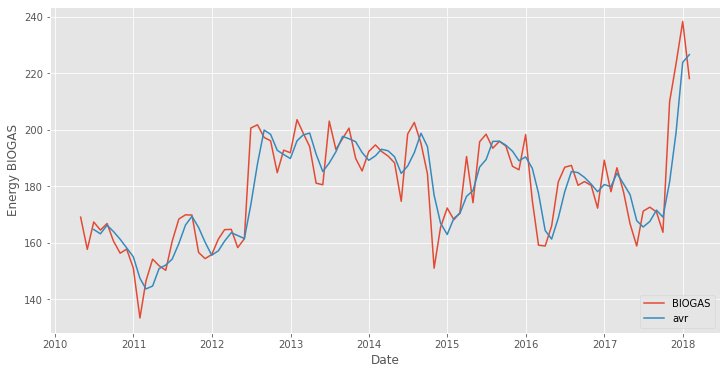

In [27]:
def plotTS(AIM):
    fig = plt.figure(figsize = (12,6))
    c = means.columns
    
    for a in c:
        if a == AIM:
            

            plt.plot(means.index, means[a], label = a)
            plt.plot(means.index, means[a].rolling(3).mean(), label = 'avr')
            
    plt.xlabel('Date')
    plt.ylabel('Energy ' + AIM)
    plt.legend(loc = 'lower right')       
    
plotTS(AIM = 'BIOGAS')

Наявне різке збільшення в 2012-13 роках, і до 2018 ряд є близьким до стаціонарного

Візуалізація усіх часових рядів

array([<AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>,
       <AxesSubplot:xlabel='TIMESTAMP'>, <AxesSubplot:xlabel='TIMESTAMP'>],
      dtype=object)

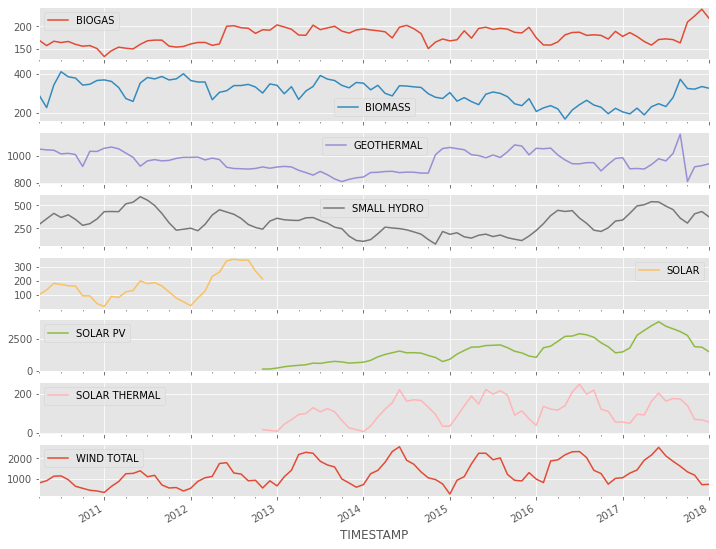

In [25]:
means.drop(columns = "Hour").plot(subplots = True, figsize = (12,10))

Як видно, наприкінці 2012 року сонячна енергетика була розділена на дві - термальну та фотовольтаїчну.

Тенденцію до росту має лише фотовольтаїна енергія, інші види є відносно стаціонарними. Дослідимо детальніше PV-енегетику

# 3. Детальний аналіз PV-енергетики

Ящики з вусами для візуалізації погодинного виробітку сонячної енергії є найкращим варіантом

{'boxes': [<matplotlib.lines.Line2D at 0x1af32f8d240>,
 'caps': [<matplotlib.lines.Line2D at 0x1af32fa9588>,
 'fliers': [<matplotlib.lines.Line2D at 0x1af32fa9e10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1af32fa9b38>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1af32f8df60>,
  <matplotlib.lines.Line2D at 0x1af332b68d0>]}

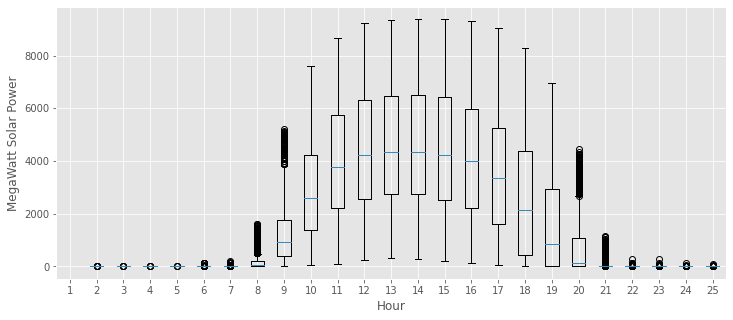

In [8]:
fig = plt.figure(figsize = (12, 5))
d1 = []
for i in range(0,25):
    d1.append(df['SOLAR PV'].loc[df['Hour'] == i].dropna())
plt.xlabel('Hour')
plt.ylabel('MegaWatt Solar Power')
plt.boxplot(d1)

C:\Users\Anton\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Hour', ylabel='SOLAR PV'>

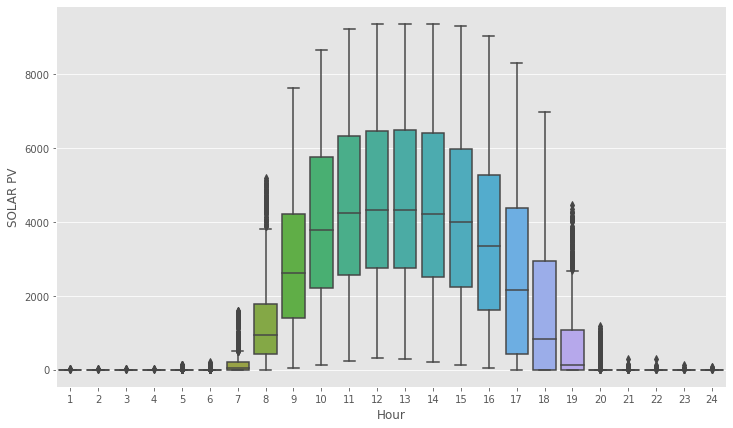

In [9]:
fig = plt.figure(figsize = (12, 7))
y = df['SOLAR PV']
hour = df['Hour'].astype(int)
sns.boxplot(hour, y)

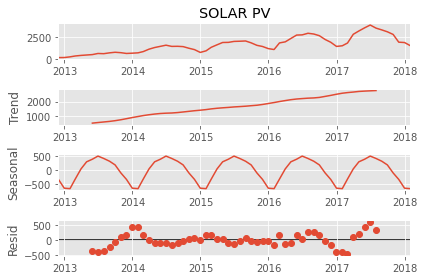

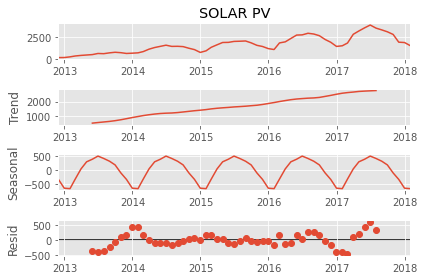

In [41]:
sm.tsa.seasonal_decompose(means[means['SOLAR PV'] > 0]['SOLAR PV']).plot()

Сезонна компонента залишається сталою в часі, і має мінімум зимою. Наявний тренд до збільшення вироблення енергії.

Для використання моделі АРІМА потрібно знати, чи ряд є стаціонарним. Очевидно, що він нестаціонарний, але перевіримо це тестом Дікі Фюлера

In [46]:
test = sm.tsa.adfuller(means[means['SOLAR PV'] > 0]['SOLAR PV'])
test[1]

0.8837876815517167

p значення є високим. Ряд має одиничні корені, а тому не є стаціонарним.
У таких випадках може допомогти логарифмування ряду, тому перевіримо, чи логарифмований часовий ряд буде стаціонарним.

In [47]:
test = sm.tsa.adfuller(np.log(means[means['SOLAR PV'] > 0]['SOLAR PV']))
test[1]

1.0490488250900049e-05

Логарифмований ряд не має одиничних коренів, а тому стаціонарний. Тому для логарифмованого ряду значений коефіцієнт для моделі АРІМА

# 4. Прогнозування вироблення сонячної енергії

Спробуємо спрогнозувати вироблення сонячної електроенергії в наступному році.

Помітимо, що ряд має тенденцію до збільшення, тому його потрібно прологарифмувати.

In [229]:
SolarPV = df.groupby(pd.Grouper(key = 'TIMESTAMP', freq = '1m')).sum()['SOLAR PV']


<AxesSubplot:xlabel='TIMESTAMP'>

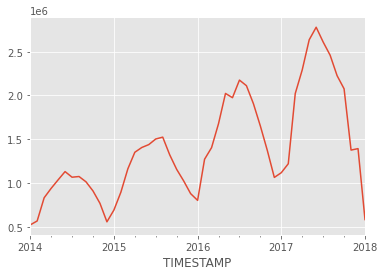

In [160]:
SolarPV.plot()

Викидаємо старі дані, так як вони можуть завадити навчанню моделі

In [230]:
SolarPV = SolarPV.drop(index = (SolarPV.index[SolarPV.index.year < 2014]))
logPV = np.log(SolarPV)

In [13]:
logPV.head()

TIMESTAMP
2014-01-31    13.162874
2014-02-28    13.246051
2014-03-31    13.630308
2014-04-30    13.751624
2014-05-31    13.850344
Freq: M, Name: SOLAR PV, dtype: float64

<AxesSubplot:xlabel='TIMESTAMP'>

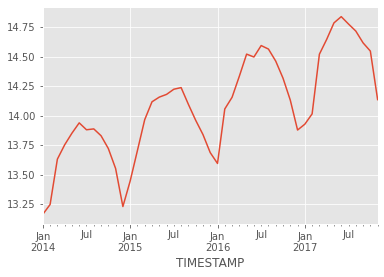

In [229]:
logPV.plot()


<AxesSubplot:xlabel='TIMESTAMP'>

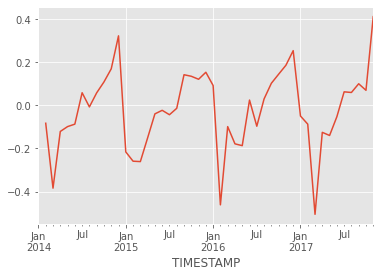

In [234]:
q = logPV.shift(1)-logPV
(q).plot()

Навчання буде відбуватися на даних до 2017 року. На даних за 2018 рік модель буде перевірена

In [231]:
X = logPV
X_train = X[X.index.year < 2017]
X_test = X[X.index.year >= 2017].index

In [231]:
x_test

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30'],
              dtype='datetime64[ns]', name='TIMESTAMP', freq='M')

Прогнозування буде здійсене за допомогою автокореляційної моделі ARIMA, параметри якої потрібно визначити

In [61]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

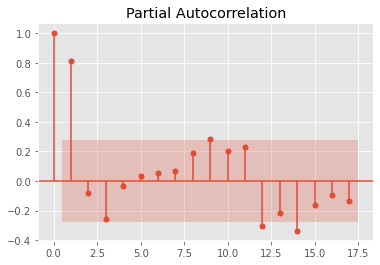

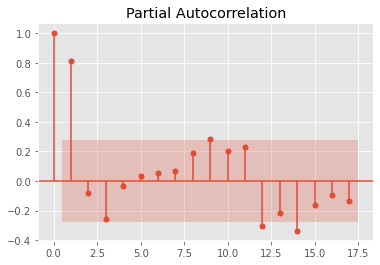

In [232]:
sm.graphics.tsa.plot_pacf(logPV)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

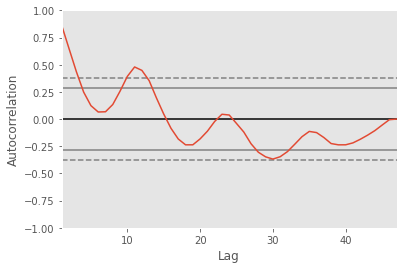

In [242]:
autocorrelation_plot(logPV)

Візьмемо парамтер p рівним 10

In [248]:
model = ARIMA(X_train, order=(12,0,0))
model = model.fit(disp=-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'ava

In [235]:
x = pd.date_range("2015-01-31", periods=50, freq="M")

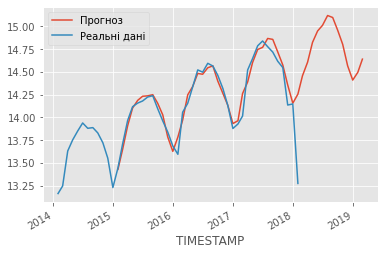

In [249]:
plt.plot(x , model.predict(x[0], x[len(x)-1]), label = 'Прогноз')
logPV.plot(label = 'Реальні дані')
plt.legend()

Піднесемо цей ряд до експоненти, щоб отримати дані для енергій

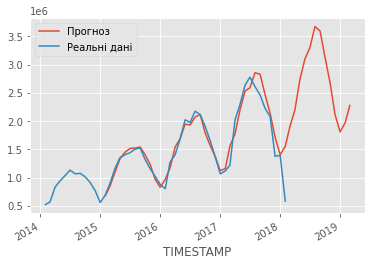

In [250]:
plt.plot(x , np.exp(model.predict(x[0], x[len(x)-1])), label = 'Прогноз')
SolarPV.plot(label = 'Реальні дані')
plt.legend()